# Todo
1. Finish code block.
2. Finish experiments and analysis.
3. Upload HW1_name.ipynb to eeclass->homework.

In [1]:
import numpy as np
import numpy.random as rd
import matplotlib.pyplot as plt

In [2]:

print(rd.rand())

0.15599589017205795


#Building environment

In this homework, we are going to implement a 6-armed bandit problem with mean:

$q_*(1)$ |$q_*(2)$ |$q_*(3)$ |$q_*(4)$ |$q_*(5)$ |$q_*(6)$  
:--:|:--:|:--:|:--:|:--:|:--:
0.3|-5|5|-1.1|1|0
<img width=50/>|<img width=50/>|<img width=50/>|<img width=50/>|<img width=50/>|<img width=50/>|

  When you chooce the $n^{th}$ bandit , the reward should be given by a normal distribution with mean $q_∗(n)$ and variance 1.



In [3]:
class bandit:

  # initialize the means and variance of the bandit
  def __init__(self, mean=[0.3, -5, 5, -1.1, 1, 0], variance = 1):
    self.mean = mean
    self.banditNums = len(mean)
    self.variance = variance

  #give a action, recieve a reward
  def step(self, action):

    # where action is the chosen bandit (i.e. action is between 0~5)
    # To return a number from a normal distribution, you might want to call the function rd.normal().
    
    
    ######## your code here ##########
    reward = rd.normal(self.mean[action],self.variance,1)
    ######################################

    return reward


#implement learing process

The learning process in this homework is relatively simple:
1. Choose an action:
  
  Generally speaking, it is better to always choose the best option, but in order to keep the exporation going, we sometimes choose random action with a probability of $\epsilon$.

2. Update the action values:

  After receiving the reward, we will update the action value. In this homework we simply use the average reward as the the action value. Try using the following relationship when updating.

  $NewEstimate\leftarrow OleEstimate + StepSize\bigg[Target - OldEstimate\bigg].$

  $Q_{n+1} = Q_{n}+1/n\times\bigg[R_n - Q_n\bigg]$


In [4]:
class learning:


  def __init__(self):
    self.env = bandit()
    self.actionValues = [0,0,0,0,0,0]
    self.chosenTimes = [0,0,0,0,0,0]

  def chooseAction(self, epsilon):
    
    # To generate random numbers, check out rd.random() and rd.randint().
    # And to find the action with maximum value (from self.actionValues), you can use np.argmax().

    ######## your code here ##########
    if rd.random() < epsilon:
        action = rd.randint(0,5)
    else:
        action = np.argmax(self.actionValues)

    ######################################
    return action

  def updateValue(self, action, reward):

    # This is how many times you have chosen this action.

    self.chosenTimes[action] +=1

    # Now, update the action value(self.actionValues[action]) with the average reward of this action.

    ######## your code here ##########
    self.actionValues[action] = self.actionValues[action] + 1/self.chosenTimes[action] * (reward - self.actionValues[action])
   

    ######################################

  def run(self, epis, epsilon):
    self.actionValues = [10,10,10,10,10,10]
    self.chosenTimes = [0,0,0,0,0,0]
    averageRewards = []
    rewards = []
    for _ in range(epis):
      action = self.chooseAction(epsilon)
      reward = self.env.step(action)
      rewards.append(reward)
      averageRewards.append(np.average(rewards))
      self.updateValue(action, reward)
    
    return rewards, averageRewards

# Test your results (60%)
- you need to get picture looking like following picture.
- We will use 'matplotlib' to visualize the result. For more information, click on the [LINK](https://matplotlib.org/2.0.2/api/pyplot_api.html) to see the documentation or search tutorials online.

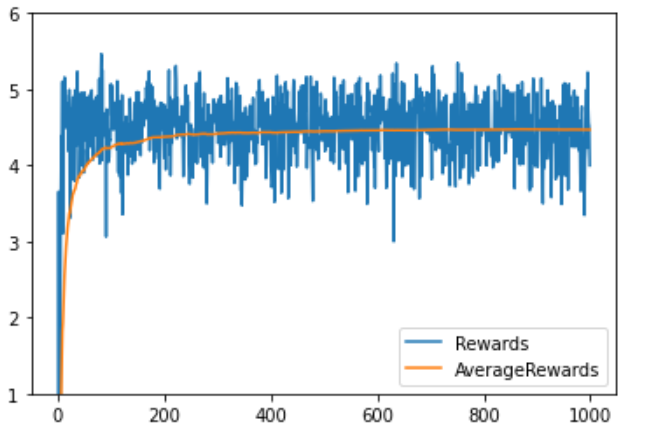

C:\Users\USER\AppData\Local\Programs\Python\Python310\lib\site-packages\numpy\core\fromnumeric.py:43: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray.
  result = getattr(asarray(obj), method)(*args, **kwds)


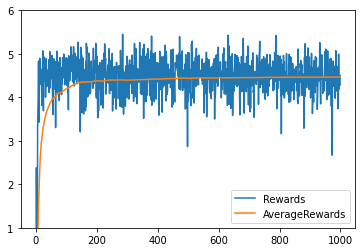

In [5]:
HW1 = learning()

# You might want to modify the following code to get different figure for the report.
rewards_all=[]
averageRewards_all=[]
rd.seed(1)
for i in range(30): 
  rewards, averageRewards = HW1.run(epis = 1000, epsilon = 0.1)
  rewards_all.append(np.array(rewards))  
  averageRewards_all.append(np.array(averageRewards))


plt.figure()
plt.plot(np.average(rewards_all,axis=0),label="Rewards")
plt.plot(np.average(averageRewards_all,axis=0),label="AverageRewards")
plt.legend()
plt.ylim(1,6)
plt.show()


# Experiments and Analysis(40%)

Q1(20%) Get average rewards curves of different settings over 1000 episodes and average the 
result of 30 learning process into a figure.


▪ Vary 𝜀 value with 0, 0.2, 0.8. What happens? Why? Please plot the curves
into a figure.



C:\Users\USER\AppData\Local\Programs\Python\Python310\lib\site-packages\numpy\core\fromnumeric.py:43: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray.
  result = getattr(asarray(obj), method)(*args, **kwds)


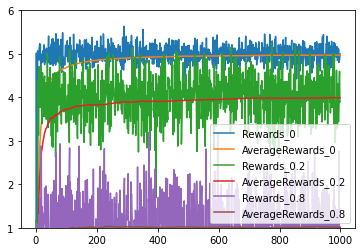

In [6]:
HW1 = learning()

# You might want to modify the following code to get different figure for the report.
epsilon_0_rewards_all=[]
epsilon_0_averageRewards_all=[]
epsilon_1_rewards_all=[]
epsilon_1_averageRewards_all=[]
epsilon_2_rewards_all=[]
epsilon_2_averageRewards_all=[]
rd.seed(1)
for i in range(30): 
  rewards0, averageRewards0 = HW1.run(epis = 1000, epsilon = 0)
  epsilon_0_rewards_all.append(np.array(rewards0))  
  epsilon_0_averageRewards_all.append(np.array(averageRewards0))

  rewards1, averageRewards1 = HW1.run(epis = 1000, epsilon = 0.2)
  epsilon_1_rewards_all.append(np.array(rewards1))  
  epsilon_1_averageRewards_all.append(np.array(averageRewards1))
  
  rewards2, averageRewards2 = HW1.run(epis = 1000, epsilon = 0.8)
  epsilon_2_rewards_all.append(np.array(rewards2))  
  epsilon_2_averageRewards_all.append(np.array(averageRewards2))


plt.figure()
plt.plot(np.average(epsilon_0_rewards_all,axis=0),label="Rewards_0")
plt.plot(np.average(epsilon_0_averageRewards_all,axis=0),label="AverageRewards_0")
plt.plot(np.average(epsilon_1_rewards_all,axis=0),label="Rewards_0.2")
plt.plot(np.average(epsilon_1_averageRewards_all,axis=0),label="AverageRewards_0.2")
plt.plot(np.average(epsilon_2_rewards_all,axis=0),label="Rewards_0.8")
plt.plot(np.average(epsilon_2_averageRewards_all,axis=0),label="AverageRewards_0.8")
plt.legend()
plt.ylim(1,6)
plt.show()


𝜀 = 0 ，rewards和平均rewards在數值=5附近；𝜀 = 0.2 ，rewards和平均rewards在數值=4附近，𝜀 = 0.8 ，rewards和平均rewards在數值=1附近，
因為當𝜀值越大，隨機動作選擇機會越大，而當𝜀值越小，動作選擇最佳actionValues機會越大。因此𝜀值=0，幾乎會一直動作選擇最佳actionValues，所以rewards值會收斂在最大reward值=5。 

Q2(10%) Is there any way to always get the best result when 𝜀 = 0? How?

當 𝜀 = 0 ，因此我的actionc會一直選擇最佳actionValues值，而上面一開始6個actionValues都是=10，因此有機率選到不好的動作，因此我們可以把
actionValuese = [10,10,10,10,10,10]改成[0,0,10,0,0,0]，這樣動作就會一直選擇最好的動作3。

Q3(10%)Is there a way to compute the value of convergence?

定義基於𝜀軟策略的最佳狀態價值函數

$$
\tilde{\nu}_* = (1 - \epsilon)*max_a\tilde{q}_*(s,a) + \sum_{i=1}^6\frac{\epsilon}{6}*\tilde{q}_*(s,a)
$$

從上面公式可以判斷，當𝜀=0時，只剩下前項，後項消失，代表最選擇最佳動作就是q*(3)，而當𝜀=1時，前項消失，只剩後項，這時選擇每個動作的機率都一樣，因此𝜀介於0~1之間，越靠近0，value of convergence越大，越靠近1，value of convergence越小。